# Decision Trees
## Exercise 1 
Ternary classification

The following code creates a small dataset with two attributes and a target
variable with three possible values:

   X1  X2  Y
0   1   1  1
1   1   1  1
2   1   1  2
3   1   0  3
4   0   0  2
5   0   0  3
0.2516291673878228
0.6666666666666666


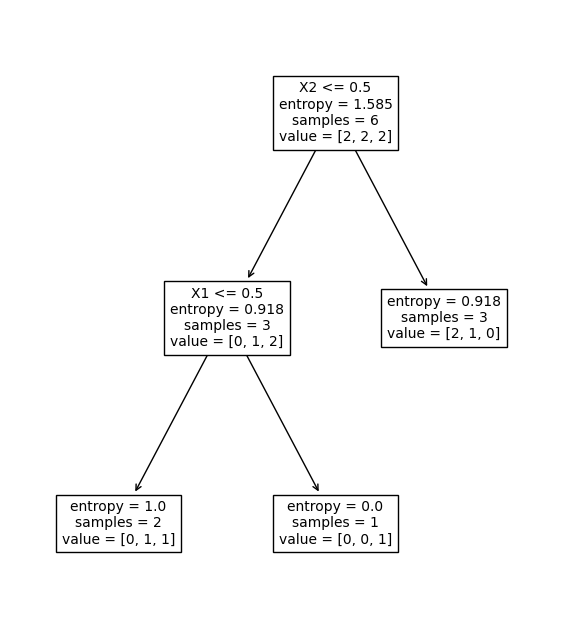

   X1  X2  Y
U   0   1  1


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
X = pd.DataFrame({'X1': [1, 1, 1, 1, 0, 0],
                  'X2': [1, 1, 1, 0, 0, 0]})
Y = pd.Series([1, 1, 2, 3, 2, 3])

dataset = pd.DataFrame({'X1': [1, 1, 1, 1, 0, 0],
                  'X2': [1, 1, 1, 0, 0, 0],
                  'Y':[1,1,2,3,2,3]})

print(dataset)

#1

def calculate_entropy(observations):
    vals,counts = np.unique(observations,return_counts=True)
    p = []
    for i in range(len(vals)):
        p.append(counts[i]/sum(counts))
    #print(p)
    return entropy(p,base=2)

def calculate_conditional_entropy(feature,target_feature):
    feature_vals, fv_counts = np.unique(dataset.filter(items=[feature]),return_counts=True)
    p_feature = []
    for i in range(len(fv_counts)):
        p_feature.append(fv_counts[i]/sum(fv_counts))
    
    ent = 0
    for i in range(len(feature_vals)):
        temp_dataset = dataset[dataset[feature] == feature_vals[i]]
        obs = temp_dataset.filter(items=[target_feature])
        ent = ent + p_feature[i]*calculate_entropy(obs)

    return ent

def calculate_information_gain(feature,target_feature):
    target_feature_obs = dataset.filter(items=[target_feature])
    H_tf = calculate_entropy(target_feature_obs)
    return H_tf - calculate_conditional_entropy(feature,target_feature)

print(calculate_information_gain('X1','Y'))
print(calculate_information_gain('X2','Y'))

#2
#attribute X2 will be used

#3
from sklearn import tree
import matplotlib.pyplot as plt
X = dataset[['X1','X2']]
y = dataset['Y']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X.columns)
plt.show()

new_instances = pd.DataFrame([
    (0, 1)
],
index=['U'],
columns=['X1', 'X2'])

new_with_pred = new_instances.copy()
new_with_pred['Y'] = dt.predict(new_instances)

print(new_with_pred)

1. Calculate the information gain for `X1` and `X2` relative to `Y`.
1. Based on these calculations, what attribute will be used for the first node of the ID3 tree?
1. Learn the entire tree and classify the instance `{'X1': 0, 'X2': 1}`.

## Exercise 2
ID3 as a "greedy" algorithm

The following code creates a dataset with features `A, B, C` and target variable `Y`:

In [2]:
import pandas as pd
X = pd.DataFrame({'A': [1, 1, 0, 0],
                  'B': [1, 0, 1, 0],
                  'C': [0, 1, 1, 1]})
Y = pd.Series([0, 1, 1, 0])

1. Find the decision tree using ID3. Is it _consistent_ with the training data (does it have 100% accuracy)?
1. Is there a less deep decision tree consistent with the above data? If so, what logic concept does it represent?

## Exercise 3

Titanic dataset

The table bellow shows a few statistics on the survivors of the Titanic:

In [23]:
import pandas as pd
titanic = pd.DataFrame([
  ('Upper', 'Male', 'Child', 5, 5),
  ('Upper', 'Male', 'Adult', 175, 57),
  ('Upper', 'Female', 'Child', 1, 1),
  ('Upper', 'Female', 'Adult', 144, 140),
  ('Lower', 'Male', 'Child', 59, 24),
  ('Lower', 'Male', 'Adult', 1492, 281),
  ('Lower', 'Female', 'Child', 44, 27),
  ('Lower', 'Female', 'Adult', 281, 176)
],
columns=['Class', 'Gender', 'Age', 'Passengers', 'Survivors'])
print(titanic)

X = titanic[['Class','Gender','Age']]
y = titanic['Survivors']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X.columns)
plt.show()

   Class  Gender    Age  Passengers  Survivors
0  Upper    Male  Child           5          5
1  Upper    Male  Adult         175         57
2  Upper  Female  Child           1          1
3  Upper  Female  Adult         144        140
4  Lower    Male  Child          59         24
5  Lower    Male  Adult        1492        281
6  Lower  Female  Child          44         27
7  Lower  Female  Adult         281        176


ValueError: could not convert string to float: 'Upper'

1. We want to build a decision tree to predict the target variable `Y` (survived) based on variables `C` (class), `G` (gender) and `A` (age). Using information gain, determine which of the three variables will be used in the root node.
2. What is the training accuracy of the decision tree consisting only of the root node above?
3. If you were to build the full tree using all attributes, what would be the training accuracy? Note that you don’t have to actually build the full tree!

## Exercise 4
Exoplanets, one-hot encoding

Given a dataset with data regarding 800 exoplanets, fit a decision tree to find how well `Size` and `Orbit` describe if a planet is habitable. In other words, find the training accuracy of a decision tree model that uses those two variables to predict `Habitable` and also print the resulting tree.

       Big Orbit Habitable
0      Big  Near       Yes
1      Big  Near       Yes
2      Big  Near       Yes
3      Big  Near       Yes
4      Big  Near       Yes
..     ...   ...       ...
795  Small   Far        No
796  Small   Far        No
797  Small   Far        No
798  Small   Far        No
799  Small   Far        No

[800 rows x 3 columns]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 ...
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


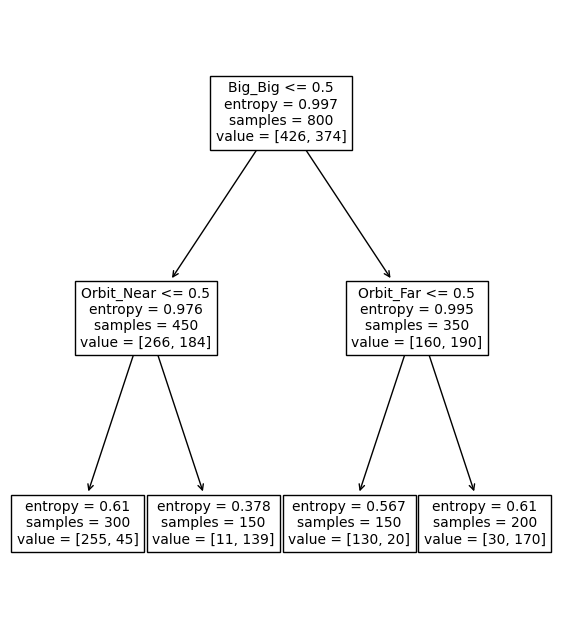

0.8675

In [37]:
from tools.pd_helpers import apply_counts
exoplanets = pd.DataFrame([
  ('Big', 'Near', 'Yes', 20),
  ('Big', 'Far', 'Yes', 170),
  ('Small', 'Near', 'Yes', 139),
  ('Small', 'Far', 'Yes', 45),
  ('Big', 'Near', 'No', 130),
  ('Big', 'Far', 'No', 30),
  ('Small', 'Near', 'No', 11),
  ('Small', 'Far', 'No', 255)
],
columns=['Big', 'Orbit', 'Habitable', 'Count'])
exoplanets = apply_counts(exoplanets, 'Count')

print(exoplanets)


from sklearn.preprocessing import OneHotEncoder
cat_features = exoplanets[['Big','Orbit']] # Note that we're selecting a matrix
enc = OneHotEncoder(sparse=False).fit(cat_features)
print(enc.transform(cat_features))
X_transformed = pd.DataFrame(enc.transform(cat_features), 
                           columns=enc.get_feature_names_out())
y = exoplanets['Habitable']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X_transformed,y)
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X_transformed.columns)
plt.show()

dt.score(X_transformed, y)

## Exercise 5

Exoplanets, continuous variable

Given a dataset with 9 exoplanets for which we know the `Temperature` as well as the target variable `Habitable`.

1. Find the training accuracy of a decision tree that predicts `Habitable` using `Temperature` and print the resulting tree.
1. Independently calculate the split points that the algorithm will use for `Temperature` and check it against the generated tree. (The solution does not need to be general, can be "hard-coded" for this dataset.)
1. Independently calculate the entropy of the root node of the generated tree.

In [3]:
exoplanets = pd.DataFrame([
  (205, 0),
  (205, 0),
  (260, 1),
  (380, 1),
  (205, 0),
  (260, 1),
  (260, 1),
  (380, 0),
  (380, 0)
],
columns=['Temperature', 'Habitable'])
exoplanets

,Temperature,Habitable
0,205,0
1,205,0
2,260,1
3,380,1
4,205,0
5,260,1
6,260,1
7,380,0
8,380,0
